# Artist similarity 
Tasks to do:

1. get a bangla corpus word-embeddings
2. get the song text as a whole string
3. get the song text as a list with each element being a line (use '\n' as a delimeter to seperate sentences)
4. use the word-embeddings to build the corresponding word vector based on its frequency

In [4]:
import numpy as np
import faiss
import os

In [32]:
author_embeddings = dict()
def add_author_embedding(author, embedding):
    if len(embedding.shape)!=2:
        return
    
    if author in author_embeddings:
        author_embeddings[author] = np.vstack((author_embeddings[author], embedding))
    else:
        author_embeddings[author] = embedding

In [33]:
path = "./song_embeddings/"

for root, dirs, files in os.walk(path):
    for file in files:
        author = file.split("_")[0]
        loaded_embedding = np.load(path+file)
        add_author_embedding(author, loaded_embedding)
        print(f"Done adding {file}")

Done adding Abdul Alim_song1.npy
Done adding Abdul Alim_song2.npy
Done adding Abdul Hai Al Hadi_song1.npy
Done adding Abdul Hai Al Hadi_song2.npy
Done adding Abdul Hai Al Hadi_song3.npy
Done adding Abdul Hai Al Hadi_song4.npy
Done adding Abdul Hai Al Hadi_song5.npy
Done adding Abdul Hai Al Hadi_song6.npy
Done adding Abdul Hai Al Hadi_song7.npy
Done adding Abdul Latif_song1.npy
Done adding Abdul Latif_song2.npy
Done adding Abdul Latif_song3.npy
Done adding Abdul Latif_song4.npy
Done adding Abdul Latif_song5.npy
Done adding Abdul Latif_song6.npy
Done adding Abdul Latif_song7.npy
Done adding Abdul Latif_song8.npy
Done adding Abu Hena Mostafa Kamal_song1.npy
Done adding Abu Hena Mostafa Kamal_song10.npy
Done adding Abu Hena Mostafa Kamal_song2.npy
Done adding Abu Hena Mostafa Kamal_song3.npy
Done adding Abu Hena Mostafa Kamal_song4.npy
Done adding Abu Hena Mostafa Kamal_song5.npy
Done adding Abu Hena Mostafa Kamal_song6.npy
Done adding Abu Hena Mostafa Kamal_song7.npy
Done adding Abu Hena 

In [47]:
author_list = list()
lyric_list = list()
total_lines = 0
# implement author to number of lyric lines mapping
for author, embed in author_embeddings.items():
    total_lines = total_lines + embed.shape[0]
    author_list.append(author)
    lyric_list.append(embed.shape[0])

print(total_lines)

42471


In [50]:
# when vectors are added to the embedding they are added sequentially and same spiel with their id's
# so max_indices contain at which maximum index does the next author end
max_indices = [lyric_list[0]]

for i in range(1, len(lyric_list)):
    max_indices.append(max_indices[i-1]+lyric_list[i])

In [52]:
index_to_author_map = dict()

author_index = 0
for i in range(max_indices[-1]):
    if i < max_indices[author_index]:
        index_to_author_map[i] = author_list[author_index]
    elif i == max_indices[author_index]:
        author_index += 1
        index_to_author_map[i] = author_list[author_index]

In [54]:
def author_for_index(index):
    for i in range(len(max_indices)):
        if index < max_indices[i]:
            return author_list[i]

In [51]:
embedding_dim = 768
index = faiss.IndexFlatIP(embedding_dim)        

In [59]:
author_embed_indices = dict()
for author, embeds in author_embeddings.items():
    index.add(embeds)
    print(f"{author} added to index object.")

Abdul Alim added to index object.
Abdul Hai Al Hadi added to index object.
Abdul Latif added to index object.
Abu Hena Mostafa Kamal added to index object.
Abu Jafor added to index object.
Abu Owahed added to index object.
Adnan Babu added to index object.
Ador added to index object.
Agun added to index object.
Ahmed Fojol Karim added to index object.
Ahmed Imtiaz Bulbul added to index object.
Ahmed Jaman Chowdhury added to index object.
Ahmed Rabbani added to index object.
Ahmed Rizvi added to index object.
Ahsan Fahmid Sumit added to index object.
Ahsan Kamrul added to index object.
Ahsan Sarwar added to index object.
Ajijur Rahman added to index object.
Ajoy Vattacharga added to index object.
Akhter Feroj added to index object.
Al Sanib Sakib added to index object.
Aladin added to index object.
Alauddin Ali added to index object.
Alom Khan added to index object.
Amitav Reza added to index object.
Amzad Hossain added to index object.
Ananda added to index object.
Anik Khan added to i

In [62]:
num_authors = len(author_list)

artist_similarity = np.zeros((num_authors,num_authors))

k = min(lyric_list) # number of nearest neighbours

In [61]:
def find_k_nearest_dist(base_author, query_author, k):
    i_th_index = faiss.IndexFlatIP(embedding_dim)
    # author_list[i] -> base_author
    i_th_index.add(author_embeddings[base_author])
    # author_list[j] -> query_author
    D, I = i_th_index.search(author_embeddings[query_author], k)

    return D

In [67]:
def artist_pair_similarity(artist1, artist2, k):
    D = find_k_nearest_dist(artist1, artist2, k)
    similarity = 0
    for i_line in range(D.shape[0]):
        for rank in range(D.shape[1]):
            similarity += D[i_line][rank]*((k+1)-rank)

    return similarity

In [69]:
for i in range(num_authors):
    for j in range(num_authors):
        artist_similarity[i][j] = artist_pair_similarity(author_list[i], author_list[j], k)
        print(f"Calculated similarity for artists {author_list[i]} and {author_list[j]}")

In [70]:
artist_similarity = np.load("artist_similarity.npy")

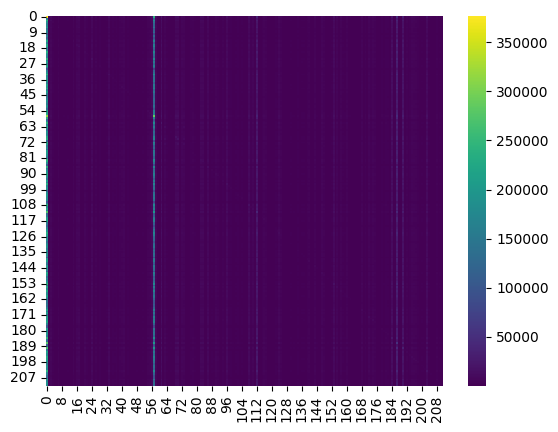

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap
sns.heatmap(artist_similarity, annot=False, cmap='viridis')

# Show the plot
plt.show()
